In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
if os.name == 'posix': # 如果系统是mac或者linux
    plt.rcParams['font.sans-serif'] = ['Songti SC'] #中文字体为宋体
else:
    plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 在windows系统下显示微软雅黑
plt.rcParams['axes.unicode_minus'] = False # 负号用 ASCII 编码的-显示，而不是unicode的 U+2212

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 10)

from tqdm import trange
from datetime import datetime


In [3]:
int(100.0)

100

# 定价及希腊字母

https://3c.wind.com.cn/l/BhHE?shareUserSign=FmFnE

完成雪球期权的定价模型并计算出相关的希腊值（delta，gamma， vega，rho，theta）。

## 蒙特卡洛模拟股价过程

|参数| 取值|
|-|-|
|名义本金 | 1 亿元|
|保证金比例 | 100%|
|波动率 (σ) | 16%|
|无风险利率 (r) | 3%|
|融券成本 (q) | 9.5%|
|敲出票息 | 16%|
|红利票息 | 16%|
|期限 | 24 个月|
|锁定期 | 3 个月|
|敲出价格 | 100%|
|敲入价格 | 75%|
|stepdown | 0.5%|
|stepdown 开始期 | 第四个月|

In [16]:

from my_snowball import my_snowball
S0 = 1
position = 1e8
margin = 1
sigma = 0.16
r_riskfree = 0.03
q = 0.095
knock_out_coupon = 0.16
hold_coupon = 0.16
T_years = 2
num_simulations = 3e5

start_date = pd.to_datetime('2021-01-05')
end_date = start_date + pd.DateOffset(years=T_years)
date_lst = pd.date_range(start=start_date + pd.DateOffset(months=4), end=end_date, freq='30D')

knock_in_barrier = 0.75
knock_out_barrier = 1.03

knock_in_out_df = pd.DataFrame(index = date_lst, data = {'knock_in_lst': knock_in_barrier, 'knock_out_lst': knock_out_barrier})

snowball_sim = my_snowball(S0, position, margin, sigma, r_riskfree, q, knock_out_coupon, hold_coupon, T_years, num_simulations, knock_in_out_df,start_date)

100%|██████████| 300000/300000 [00:33<00:00, 8889.50it/s] 


In [15]:
snowball_sim.date_index
snowball_sim.stock_price_df

,0,1,2,3,4,...,299995,299996,299997,299998,299999
2021-05-05,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000
2021-05-06,0.997676,0.993391,0.987025,1.006929,0.999592,...,1.010828,1.004025,1.005394,1.010956,0.989949
2021-05-07,1.002980,0.980021,1.000782,0.996995,1.003433,...,1.007404,1.005527,1.000162,1.002304,0.990708
2021-05-08,1.015212,0.972511,0.987998,0.984471,1.002525,...,1.004561,0.996184,0.999987,0.998732,1.002235
2021-05-09,1.007866,0.996916,1.002568,0.992799,1.001456,...,0.985332,0.999086,0.993435,1.005499,0.998425
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,1.201289,0.745376,0.805425,0.878661,0.887551,...,0.914413,0.935363,0.628171,0.683513,0.961211
2023-05-02,1.201693,0.743766,0.804051,0.883818,0.890348,...,0.905715,0.926324,0.633484,0.681088,0.962007
2023-05-03,1.212972,0.752527,0.798388,0.873546,0.883511,...,0.906733,0.930230,0.632355,0.681803,0.941532
2023-05-04,1.216589,0.748454,0.791034,0.863427,0.876970,...,0.895670,0.930022,0.639769,0.682369,0.930213


100%|██████████| 10000/10000 [00:03<00:00, 2707.55it/s]


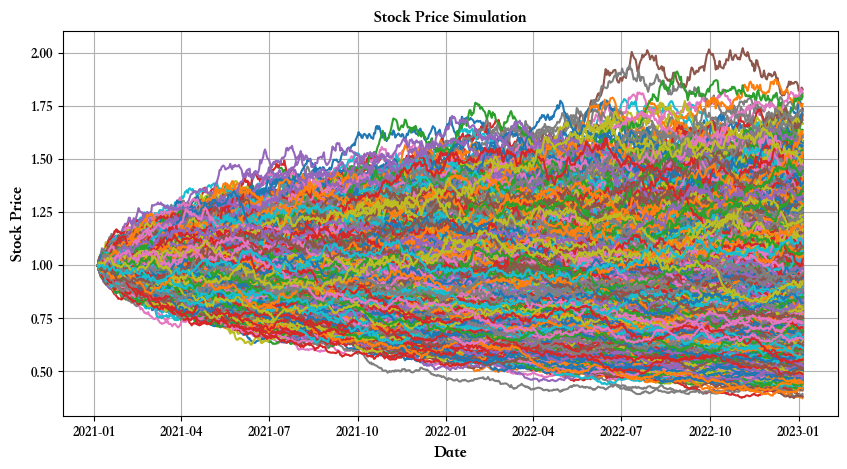

In [5]:
snowball_sim.stock_price_line_plot()

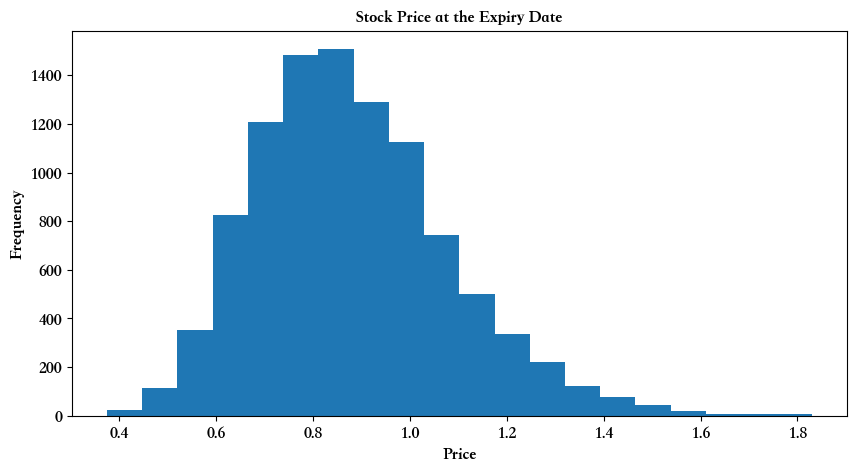

In [6]:
snowball_sim.stock_price_hist_plot()

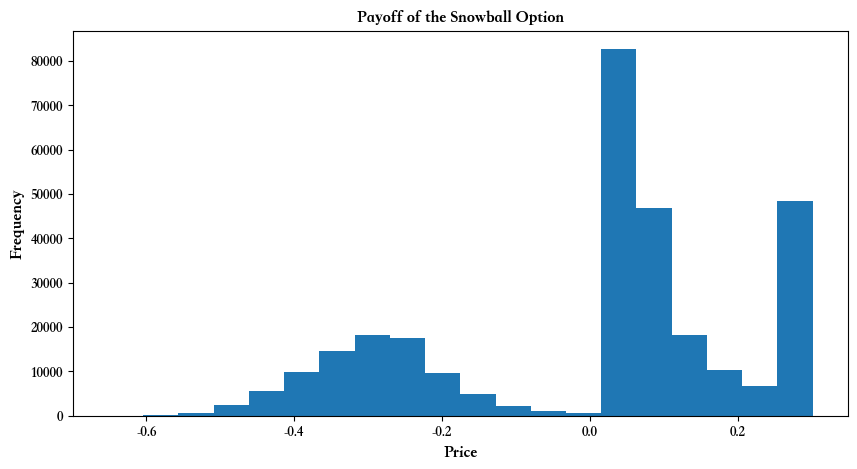

In [17]:
snowball_sim.snowball_payoff_hist_plot()

1. 每月观察期敲出，则终止并获得全部本金和年化敲出票息；

2. 没有敲入也没有敲出，则期末获得全部本金和年化红利票息；

3. 每日观察期敲入，期末未敲出，则获得与收益凭证本金相同的看跌空头，行权价为收益凭证本金相同数额。

In [18]:
snowball_sim.snowball_status

,0,1,2,3,4,...,299995,299996,299997,299998,299999
2021-05-05,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0
2021-06-04,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0
2021-07-04,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0
2021-08-03,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0
2021-09-02,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-28,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,-1.0,0.0
2022-09-27,0.0,0.0,-1.0,1.0,1.0,...,1.0,0.0,-1.0,-1.0,0.0
2022-10-27,0.0,0.0,-1.0,1.0,1.0,...,1.0,0.0,0.0,-1.0,0.0
2022-11-26,0.0,0.0,-1.0,1.0,1.0,...,1.0,0.0,0.0,-1.0,1.0


In [19]:
snowball_sim.snowball_sttc_df

,payoff,time (Year),time (Month),percent
敲入,-0.292414,2.000000,24.000000,0.290083
敲出,0.089364,0.572472,6.869665,0.564477
未敲入敲出,0.301365,2.000000,24.000000,0.145440


# bak

## 定价-封装前-用np.zeros提速

In [ ]:
Position = 1e8
margin = 1
sigma = 0.16
r_riskfree = 0.03
q = 0.095
knock_out_coupon = 0.16
hold_coupon = 0.16
T_years = 2
lock_peroiod = 0.25 # 与敲出期有关，只锁定敲出不锁定敲入
knock_out_barrier = 1
knock_in_barrier = 0.75
stepdown = 0.005 # 这是逐级下调雪球产品，展示敲出期的变化规律
stepdown_start = 4/12

S0 = 1
K = S0

In [ ]:
start_date = pd.to_datetime('2021-01-05')
end_date = start_date + pd.DateOffset(years=T_years)
date_index = pd.date_range(start=start_date, end=end_date, freq='D')
T_days = len(date_index)
date_index

DatetimeIndex(['2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10', '2021-01-11', '2021-01-12',
               '2021-01-13', '2021-01-14',
               ...
               '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30',
               '2022-12-31', '2023-01-01', '2023-01-02', '2023-01-03',
               '2023-01-04', '2023-01-05'],
              dtype='datetime64[ns]', length=731, freq='D')

In [ ]:
def bs_model_price(S0, r, sigma, T_years, T_days):
    dt = T_years/T_days
    t = np.linspace(0, T_years, T_days)
    W = np.random.standard_normal(size=T_days)
    W = np.cumsum(W)*np.sqrt(dt)
    X = (r-q-0.5*sigma**2)*t + sigma*W
    S = S0*np.exp(X)
    return S


In [ ]:
def simulation(S0, r_riskfree, q, sigma, T_years, sample_size = 10000, steps = 365, plotpath = False, plothist = False):
    # dn是啥
    delta_t = 1/steps
    Spath = np.zeros((T_years * steps + 1, I))
    Spath[0] = S0

    for t in trange(1, T_years * steps + 1):
        z = np.random.standard_normal(sample_size)
        middle1 = Spath[t-1, 0:sample_size] * np.exp((r_riskfree - q - 0.5 * sigma ** 2) * delta_t + sigma * np.sqrt(delta_t) * z)
        uplimit = Spath[t-1] * 1.1 # 涨幅限制
        lowlimit = Spath[t-1] * 0.9 # 跌幅限制
        temp = np.where(uplimit < middle1, uplimit, middle1)
        temp = np.where(lowlimit > middle1, lowlimit, temp)
        Spath[t, 0:sample_size] = temp

    return Spath

In [ ]:
stock_price_array = simulation(S0, r_riskfree, q, sigma, T_years, I = 10000,dn = 0, steps = 365, plotpath = False, plothist = False)
stock_price_df = pd.DataFrame(stock_price_array, index = date_index)

100%|██████████| 730/730 [00:00<00:00, 2369.58it/s]


In [ ]:
import os
if not os.path.exists('./result/'):   #os：operating system，包含操作系统功能，可以进行文件操作
    os.mkdir('./result/') #如果存在那就是这个result_path，如果不存在那就新建一个

class my_plot():  # 后面再封装一些其他函数
    def __init__(self, plot_df, plot_name):
        self.plot_df = plot_df
        self.plot_name = plot_name

    def line_plot(self):  # name包括title，xlabel，ylabel，save_name
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
        fontsize = 12
        x = self.plot_df.index
        y_labels = self.plot_df.columns
        for i in trange(len(y_labels)):
            clmn = y_labels[i]
            axes.plot(x, self.plot_df.loc[:, clmn].values, label=clmn)
        axes.set_title(f'{self.plot_name[0]}', fontsize=fontsize)
        axes.set_xlabel(f'{self.plot_name[1]}', fontsize=fontsize)
        axes.set_ylabel(f'{self.plot_name[2]}', fontsize=fontsize)
        axes.grid()
        # plt.legend()
        # plt.legend(fontsize = fontsize * 0.7, loc = 'best',ncol = 10,bbox_to_anchor=(1.03, -0.25))
        # axes.set_xticks( range(0,21,2) )
        # axes.set_xticklabels( [i for i in axes.get_xticks()], rotation=0 )
        mpl.rc('xtick', labelsize=fontsize)
        mpl.rc('ytick', labelsize=fontsize)
        plt.savefig(f"./result/{self.plot_name[3]}_line_plot.jpg", bbox_inches='tight', dpi=300, pad_inches=0.0)
        # plt.show()
    def hist_plot(self):
        fig, ax = plt.subplots(figsize=(10, 5))
        
        fontsize = 12
        ax.hist(self.plot_df,bins = 20)
        ax.set_title(f'{self.plot_name[0]}', fontsize=fontsize)
        ax.set_xlabel(f'{self.plot_name[1]}', fontsize=fontsize)
        ax.set_ylabel(f'{self.plot_name[2]}', fontsize=fontsize)
        plt.savefig(f"./result/{self.plot_name[3]}_hist_plot.jpg", bbox_inches='tight', dpi=300, pad_inches=0.0)
    
    def quantiles_plot(self):
        qtl_df = self.plot_df
        qtl_df.dropna(inplace=True)
        qtl_df = qtl_df.rank() / len(qtl_df)

        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
        fontsize = 12

        ax.scatter(qtl_df['x'], qtl_df['y'], s=0.00001)
        ax.set_title(f'{self.plot_name[0]}', fontsize=fontsize)
        ax.set_xlabel(f'{self.plot_name[1]}', fontsize=fontsize)
        ax.set_ylabel(f'{self.plot_name[2]}', fontsize=fontsize)
        ax.grid()
        # plt.legend(fontsize = fontsize * 0.7, loc = 'best',ncol = 10,bbox_to_anchor=(1.03, -0.25))
        # ax.set_xticks( range(0,21,2) )
        # ax.set_xticklabels( [i for i in ax.get_xticks()], rotation=0 )
        mpl.rc('xtick', labelsize=fontsize)
        mpl.rc('ytick', labelsize=fontsize)
        plt.savefig(f"./result/{self.plot_name[3]}_quantiles_plot.jpg", bbox_inches='tight', dpi=300, pad_inches=0.0)
        # plt.show()
    
    def bar_plot(self):
        fig, ax = plt.subplots(figsize=(10, 10))
        hist_x = [str(x) for x in self.index]
        hist_y = self.values
        ax.bar(hist_x, hist_y)
        ax.set_xlabel('逐笔交易对应时间',fontsize = 30)
        ax.set_ylabel('频数',fontsize = 30)
        plt.savefig(f"./result/{self.plot_name[3]}_bar_plot.jpg", bbox_inches='tight', dpi=300, pad_inches=0.0)
        

100%|██████████| 10000/10000 [00:07<00:00, 1256.38it/s]


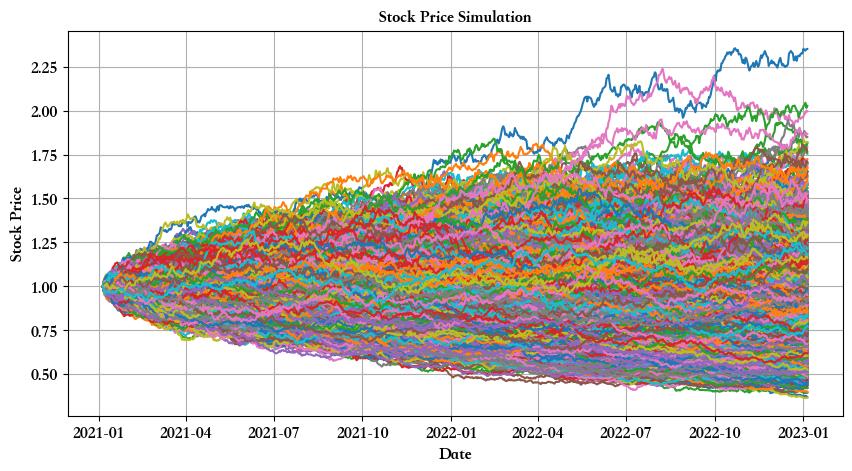

In [ ]:
_ = my_plot(stock_price_df,['Stock Price Simulation','Date','Stock Price','stock_price'])
_.line_plot()

In [ ]:
paramter_name = ['Position', 'margin', 'sigma', 'r_riskfree', 'q', 'knock_out_coupon', 'hold_coupon', 'T_years', 'lock_peroiod', 'knock_out_barrier', 'knock_in_barrier', 'stepdown', 'stepdown_start']
paramter_value = [1.00E+08, 1, 0.16, 0.03, 0.095, 0.16, 0.16, 2, 0.25, 1, 0.75, 0.005,  4/12]
pd.DataFrame({k:[v] for k, v in zip(paramter_name, paramter_value)})

,Position,margin,sigma,r_riskfree,q,...,lock_peroiod,knock_out_barrier,knock_in_barrier,stepdown,stepdown_start
0,100000000.0,1,0.16,0.03,0.095,...,0.25,1,0.75,0.005,0.333333


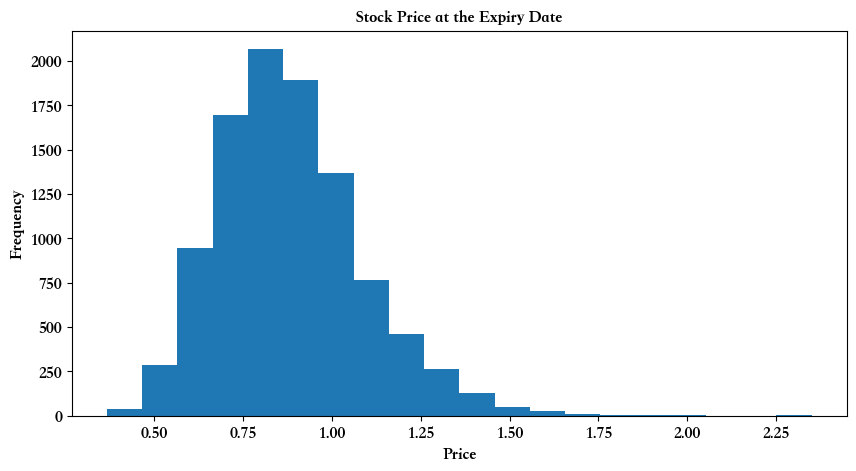

In [ ]:
_ = my_plot(stock_price_df.iloc[-1,:],['Stock Price at the Expiry Date','Price','Frequency','stock_price'])
_.hist_plot()

1. 每月观察期敲出，则终止并获得全部本金和年化敲出票息；

2. 没有敲入也没有敲出，则期末获得全部本金和年化红利票息；

3. 每日观察期敲入，期末未敲出，则获得与收益凭证本金相同的看跌空头，行权价为收益凭证本金相同数额。

In [ ]:
from datetime import datetime
date_lst = ['20210406', '20210506', '20210607', '20210705', '20210805', '20210906', '20211008', '20211105', '20211206', '20220105', '20220207', '20220307', '20220406', '20220505', '20220606', '20220705', '20220805', '20220905', '20221010', '20221107', '20221205', '20230105']
date_lst = [datetime.strptime(date, '%Y%m%d') for date in date_lst]
# stepdown_lst = [1.000,1.000, 1.000, 0.995, 0.990, 0.985, 0.980, 0.975, 0.970, 0.965, 0.960, 0.955, 0.950, 0.945, 0.940, 0.935, 0.930, 0.925, 0.920, 0.915, 0.910, 0.905]
stepdown_lst = [1.000] * 2 + [round(1 - 0.005 * i,3) for i in range(20)]
knock_in_out_df = pd.DataFrame(index = date_lst, data = {'knock_in_lst': knock_in_barrier, 'knock_out_lst': stepdown_lst})
knock_in_out_df

,knock_in_lst,knock_out_lst
2021-04-06,0.75,1.000
2021-05-06,0.75,1.000
2021-06-07,0.75,1.000
2021-07-05,0.75,0.995
2021-08-05,0.75,0.990
...,...,...
2022-09-05,0.75,0.925
2022-10-10,0.75,0.920
2022-11-07,0.75,0.915
2022-12-05,0.75,0.910


In [ ]:
def price2status(stock_price_df,knock_in_out_df):
    snow_price_df = stock_price_df.loc[knock_in_out_df.index,:]
    snow_df = snow_price_df.copy()
    snow_price_df['knock_out'] = knock_in_out_df['knock_out_lst']
    snow_price_df['knock_in'] = knock_in_out_df['knock_in_lst']
    snow_df[(snow_df.T > snow_price_df['knock_out']).T] = 1
    snow_df[(snow_df.T < snow_price_df['knock_in']).T] = -1
    snow_df[abs(snow_df) != 1] = 0
    return snow_df
snowball_status = price2status(stock_price_df,knock_in_out_df)
snowball_status

,0,1,2,3,4,...,9995,9996,9997,9998,9999
2021-04-06,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0
2021-05-06,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0
2021-06-07,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0
2021-07-05,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0
2021-08-05,1.0,-1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-05,0.0,-1.0,-1.0,1.0,-1.0,...,1.0,1.0,0.0,1.0,1.0
2022-10-10,1.0,-1.0,-1.0,1.0,-1.0,...,1.0,1.0,0.0,1.0,1.0
2022-11-07,0.0,-1.0,-1.0,1.0,-1.0,...,1.0,1.0,0.0,1.0,1.0
2022-12-05,0.0,-1.0,-1.0,1.0,-1.0,...,1.0,1.0,0.0,1.0,1.0


In [ ]:
clmn = snowball_status.columns[0]
stock_price_df.loc[:,clmn][-1]

0.9050619670270651

In [ ]:
stock_price_df.iloc[-1,:]

0       0.905062
1       0.702851
2       0.697639
3       1.113303
4       0.462039
          ...   
9995    1.092815
9996    0.889994
9997    0.922266
9998    1.164595
9999    1.178524
Name: 2023-01-05 00:00:00, Length: 10000, dtype: float64

Timestamp('2021-01-05 00:00:00', freq='D')

In [ ]:
def snowball_payoff(snowball_status, stock_price_df, margin, r_riskfree, knock_out_coupon, hold_coupon):    
    start_date = stock_price_df.index[0]
    payoff_lst = []
    time_out_lst = []
    knock_status_lst = []

    for clmn in snowball_status.columns:
        if snowball_status.loc[:,clmn].max() == 1: # 敲出吃利息
            time_delta = snowball_status.loc[:,clmn].idxmax() - start_date# 从这个时候贴现回来
            time_out = time_delta.days/365
            payoff = (knock_out_coupon * time_out) * np.exp(-r_riskfree * time_out) * margin
            knock_status = '敲出'
        elif snowball_status.loc[:,clmn].min() == -1: # 敲入赔期权
            time_out = T_years
            payoff = min(stock_price_df.loc[:,clmn][-1]-S0,0) * np.exp(-r_riskfree * time_out) * margin
            knock_status = '敲入'
        else:
            time_out = T_years
            payoff = (hold_coupon * time_out) * np.exp(-r_riskfree * time_out) * margin
            knock_status = '未敲入敲出'
        payoff_lst.append(payoff)
        time_out_lst.append(time_out)
        knock_status_lst.append(knock_status)
    return payoff_lst,time_out_lst, knock_status_lst
payoff_lst,time_out_lst, knock_status_lst = snowball_payoff(snowball_status, stock_price_df, margin, r_riskfree, knock_out_coupon, hold_coupon)

In [ ]:
stock_price_df.loc[:,clmn][-1]

1.178523589251751

In [ ]:
snowball_df = pd.DataFrame()
snowball_df['payoff'] = payoff_lst
snowball_df['time (Year)'] = time_out_lst
snowball_df['time (Month)'] = snowball_df['time (Year)'] * 12
snowball_df['knock_status'] = knock_status_lst
snowball_descriptive_df = snowball_df.groupby('knock_status').mean()
snowball_distribution_df = (snowball_df['knock_status'].value_counts()/len(snowball_df)).rename('percent')
pd.concat([snowball_descriptive_df,snowball_distribution_df],axis=1)

,payoff,time (Year),time (Month),percent
敲入,-0.302569,2.000000,24.00000,0.2068
敲出,0.076572,0.490473,5.88568,0.7599
未敲入敲出,0.301365,2.000000,24.00000,0.0333


<AxesSubplot:>

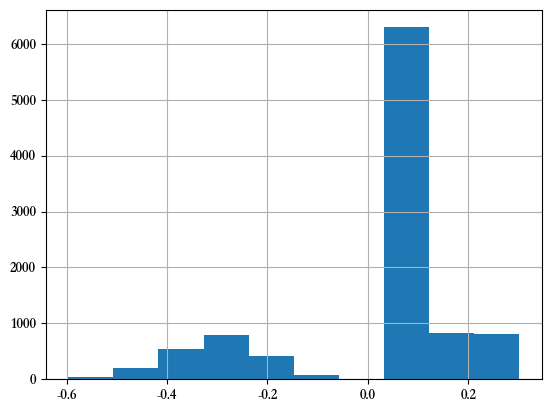

In [ ]:
snowball_df['payoff'].hist()

In [ ]:
snowball_df[snowball_df['knock_status'] == '敲入']['payoff'].describe()

count    2068.000000
mean       -0.302569
std         0.090038
min        -0.596728
25%        -0.363578
50%        -0.296570
75%        -0.239827
max        -0.093139
Name: payoff, dtype: float64

## bak-存一列有点麻烦。也许先算Payoff再存

In [239]:
_ = bs_model_price(S0, r_riskfree, sigma, T_years, len(date_index))
__ = np.concatenate([[_,_]],axis=1)
pd.DataFrame(__)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730
0,100.20292,100.400319,100.369216,99.428938,100.183451,100.014458,99.980249,100.650132,101.947495,102.997715,102.911017,101.247597,100.094636,98.95883,99.118102,99.642369,99.736448,99.836364,100.476838,100.991968,99.812815,99.725644,100.48449,101.184558,101.482595,101.245891,103.022019,103.241505,103.124237,103.672662,104.349724,105.183035,105.085874,105.116237,104.874121,105.649492,105.263039,104.113663,104.105097,103.383615,104.445428,104.873333,103.602368,104.258517,103.684338,101.00587,99.528462,98.408291,98.399218,97.423641,97.33011,96.113375,94.143029,95.346382,95.469586,94.401721,93.246931,92.769789,93.96878,95.24787,96.941947,97.933223,97.114404,96.63821,96.981606,96.460431,96.829698,98.487743,98.850128,98.411138,97.261858,96.887982,97.57702,96.940005,95.472286,93.444763,92.707463,93.008524,92.764324,93.388147,93.475865,94.643363,95.701792,96.411191,96.157358,96.528235,97.390239,98.517769,97.195513,98.027629,97.584384,97.335989,96.020702,95.537578,96.397026,96.571341,96.544096,96.076526,95.45863,95.859968,95.803164,97.387027,98.191275,96.647133,96.992972,98.484695,97.879084,97.527588,98.086933,98.060341,98.340601,97.921586,97.822742,98.360078,98.649252,98.625

In [240]:
from tqdm import trange
pd.set_option('display.max_columns', 10000)
stock_price_df = pd.DataFrame(index=date_index)

price_lst = list(bs_model_price(S0, r_riskfree, sigma, T_years, T_days))

for i in trange(10000):
    price_array_temp = bs_model_price(S0 r_riskfree, sigma, T_years, T_days)
    price_lst = price_lst + list(price_array_temp)
stock_price_df = pd.DataFrame(np.array(price_lst).reshape(-1,T_days),columns=date_index).T
stock_price_df

SyntaxError: invalid syntax (314479457.py, line 8)

In [ ]:
from tqdm import trange
pd.set_option('display.max_columns', 10000)
stock_price_df = pd.DataFrame(index=date_index)

for i in trange(10000):
    price_array_temp = bs_model_price(S0, r_riskfree, sigma, T_years, T_days)
    stock_price_df.loc[:,f'price_{i}'] = price_array_temp
stock_price_df

In [ ]:
from tqdm import trange
pd.set_option('display.max_columns', 10000)
stock_price_df = pd.DataFrame(index=date_index)

price_array = bs_model_price(S_0, r_riskfree, sigma, T_years, T_days)
price_array_temp = bs_model_price(S_0, r_riskfree, sigma, T_years, T_days)
price_array = np.concatenate([[price_array,price_array_temp]],axis=0)

for i in trange(10000):
    price_array_temp = bs_model_price(S_0, r_riskfree, sigma, T_years, T_days)
    price_array = np.concatenate([price_array,[price_array_temp]],axis=0)
stock_price_df = pd.DataFrame(price_array,columns=date_index).T
stock_price_df

In [ ]:
for i in trange(10000):
    bs_model_price(S_0, r_riskfree, sigma, T_years, len(date_index))

100%|██████████| 10000/10000 [00:00<00:00, 15335.02it/s]


## bak-定价-有点慢，提速下

In [ ]:
Position = 1e8
margin = 1
sigma = 0.16
r_riskfree = 0.03
q = 0.095
knock_out_coupon = 0.16
hold_coupon = 0.16
T_years = 2
lock_peroiod = 0.25 # 与敲出期有关，只锁定敲出不锁定敲入
knock_out_barrier = 1
knock_in_barrier = 0.75
stepdown = 0.005 # 这是逐级下调雪球产品，展示敲出期的变化规律
stepdown_start = 4/12

S0 = 1
K = S0

In [ ]:
import pandas as pd
start_date = pd.to_datetime('2021-01-05')
end_date = start_date + pd.DateOffset(years=T_years)
date_index = pd.date_range(start=start_date, end=end_date, freq='D')
T_days = len(date_index)
date_index

DatetimeIndex(['2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10', '2021-01-11', '2021-01-12',
               '2021-01-13', '2021-01-14',
               ...
               '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30',
               '2022-12-31', '2023-01-01', '2023-01-02', '2023-01-03',
               '2023-01-04', '2023-01-05'],
              dtype='datetime64[ns]', length=731, freq='D')

In [ ]:
import numpy as np
import pandas as pd
def bs_model_price(S0, r, sigma, T_years, T_days):
    dt = T_years/T_days
    t = np.linspace(0, T_years, T_days)
    W = np.random.standard_normal(size=T_days)
    W = np.cumsum(W)*np.sqrt(dt)
    X = (r-q-0.5*sigma**2)*t + sigma*W
    S = S0*np.exp(X)
    return S


1. 每月观察期敲出，则终止并获得全部本金和年化敲出票息；

2. 没有敲入也没有敲出，则期末获得全部本金和年化红利票息；

3. 每日观察期敲入，期末未敲出，则获得与收益凭证本金相同的看跌空头，行权价为收益凭证本金相同数额。

In [ ]:
from datetime import datetime
date_lst = ['20210406', '20210506', '20210607', '20210705', '20210805', '20210906', '20211008', '20211105', '20211206', '20220105', '20220207', '20220307', '20220406', '20220505', '20220606', '20220705', '20220805', '20220905', '20221010', '20221107', '20221205', '20230105']
date_lst = [datetime.strptime(date, '%Y%m%d') for date in date_lst]
# stepdown_lst = [1.000,1.000, 1.000, 0.995, 0.990, 0.985, 0.980, 0.975, 0.970, 0.965, 0.960, 0.955, 0.950, 0.945, 0.940, 0.935, 0.930, 0.925, 0.920, 0.915, 0.910, 0.905]
stepdown_lst = [1.000] * 2 + [round(1 - 0.005 * i,3) for i in range(20)]

In [ ]:
def snowball_payoff(stock_array,date_index,date_lst,stepdown_lst,knock_in_barrier,S0):    
    stock_df = pd.DataFrame(stock_array, index=date_index, columns=['stock_price'])
    snow_df = stock_df.loc[date_lst,:]
    snow_df['knock_status'] = [1 if snow_df['stock_price'][i] > stepdown_lst[i] * S0 else -1 if snow_df['stock_price'][i] < knock_in_barrier * S0 else 0 for i in range(len(date_lst))]
    if snow_df['knock_status'].max() == 1: # 敲出吃利息
        time_delta = snow_df['knock_status'].idxmax() - start_date# 从这个时候贴现回来
        time_out = time_delta.days/365
        # payoff = (1 + knock_out_coupon * time_out) * np.exp(-r_riskfree * time_out) * margin
        payoff = (knock_out_coupon * time_out) * np.exp(-r_riskfree * time_out) * margin
        knock_status = '敲出'
    elif snow_df['knock_status'].min() == -1: # 敲入赔期权
        time_out = T_years
        # payoff = min(stock_array[-1]/S0,1) * np.exp(-r_riskfree * time_out) * margin
        payoff = min(stock_array[-1]-S0,0) * np.exp(-r_riskfree * time_out) * margin
        knock_status = '敲入'
    else:
        time_out = T_years
        # payoff = (1 + hold_coupon * time_out) * np.exp(-r_riskfree * time_out) * margin
        payoff = (hold_coupon * time_out) * np.exp(-r_riskfree * time_out) * margin
        knock_status = '未敲入敲出'
    return payoff,time_out, knock_status

In [ ]:
from tqdm import trange
pay_lst = []
time_out_lst = []
knock_status_lst = []
for i in trange(10000):
    stock_array = bs_model_price(S0, r_riskfree, sigma, T_years, len(date_index))
    pay, time_out, knock_status = snowball_payoff(stock_array,date_index,date_lst,stepdown_lst,knock_in_barrier,S0)
    pay_lst.append(pay)
    time_out_lst.append(time_out)
    knock_status_lst.append(knock_status)
np.mean(pay_lst)

In [ ]:
snowball_df = pd.DataFrame()
snowball_df['payoff'] = pay_lst
snowball_df['time (Year)'] = time_out_lst
snowball_df['time (Month)'] = snowball_df['time (Year)'] * 12
snowball_df['knock_status'] = knock_status_lst
snowball_descriptive_df = snowball_df.groupby('knock_status').mean()
snowball_distribution_df = (snowball_df['knock_status'].value_counts()/len(snowball_df)).rename('percent')
pd.concat([snowball_descriptive_df,snowball_distribution_df],axis=1)

,payoff,time (Year),time (Month),percent
敲入,-0.302569,2.000000,24.00000,0.2068
敲出,0.076572,0.490473,5.88568,0.7599
未敲入敲出,0.301365,2.000000,24.00000,0.0333


<AxesSubplot:>

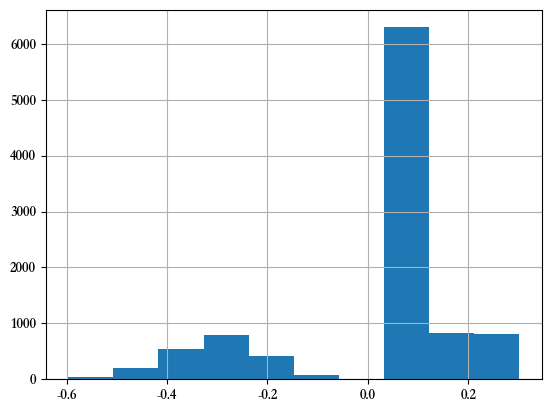

In [ ]:
snowball_df['payoff'].hist()